In [ ]:
# KNN 1

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Excel dosyasından verileri oku
df = pd.read_excel("/content/RawDataset4k.xlsx")
sentences = df["description"].values  # Cümleler
labels = df["Toplu"].values  # Sınıf etiketleri

# Özellik çıkarma: cümleleri kelime sayısına göre özellik olarak temsil et
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['description'].values.astype(str))

# Özellikleri standartlaştır
scaler = StandardScaler(with_mean=False, with_std=False)
X_scaled = scaler.fit_transform(X)

# Veri kümesini eğitim ve test kümelerine ayır
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.3, random_state=42)

# KNN modelini eğit
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

# Test kümesini kullanarak modeli değ0.59erlendir
accuracy = knn_clf.score(X_test, y_test)
print("Modelin doğruluk oranı: {:.2f}".format(accuracy))

ValueError: ignored

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Karar ağacı modelini tanımlayın
model = DecisionTreeClassifier()

# Modeli eğitin
model.fit(X_train, y_train)

# Modeli kullanarak tahminler yapın
y_pred = model.predict(X_test)

# Precision, recall ve F-measure hesaplayın
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f_measure = f1_score(y_test, y_pred, average='macro')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F-measure: {:.2f}".format(f_measure))


Precision: 0.44
Recall: 0.44
F-measure: 0.44


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# RMSE hesaplamak için mean_squared_error fonksiyonunu kullanın
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 0.90


In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np

# ROC AUC skorunu hesaplamak için y_pred_prob değişkenini kullanıyoruz
y_pred_prob = model.predict_proba(X_test)
num_classes = len(np.unique(y_test))
# Her sınıf için ROC AUC alanını hesaplamak için bir döngü oluşturuyoruz
roc_area = []
for i in range(num_classes):
    roc_area.append(round(roc_auc_score(y_test == i, y_pred_prob[:, i]), 2))

print("Her bir sınıf için Yaklaşık ROC Alanı:", roc_area)

Her bir sınıf için Yaklaşık ROC Alanı: [0.63, 0.74, 0.71]


In [ ]:
#from sklearn.metrics import roc_auc_score

# Determine the number of classes
#num_classes = len(np.unique(y_test))

# Calculate the ROC AUC score for each class
#roc_area = []
#for i in range(num_classes):
#    roc_area.append(round(roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i]), 2))

#print("Approximate ROC Area for each class:", roc_area)


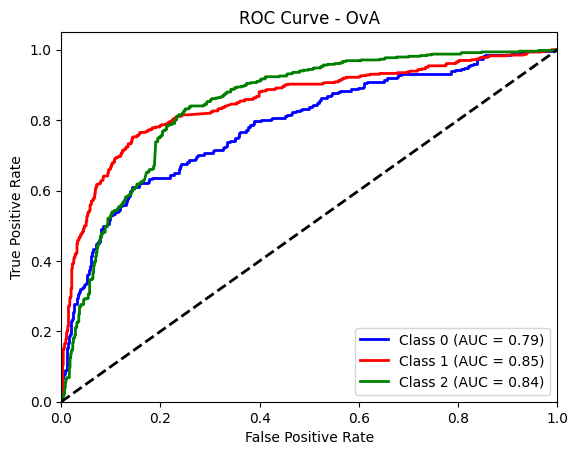

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# df, vectorizer, scaler gibi değişkenlerin ve X_train, X_test, y_train, y_test'in tanımlandığı bir yer olduğunu varsayalım

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Train the Naive Bayes classifier
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)

# Calculate the class probabilities
y_pred_prob = nb_clf.predict_proba(X_test)

# Calculate the false positive rate, true positive rate, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = 3  # Sınıf sayısı
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - OvA')
plt.legend(loc="lower right")
plt.show()

